In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

In [2]:
#Reading data
house_data=pd.read_csv("E:/Project's Datasets/House Price Prediction/House data.csv")
house_data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house_data.drop(["Unnamed: 0","id","date"],axis=1,inplace=True)
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house_data.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
#Finding NAN values
house_data.isnull().sum()

price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [6]:
#Replacing NAN values
mean=house_data['bedrooms'].mean()
house_data['bedrooms'].replace(np.nan,mean, inplace=True)
mean=house_data['bathrooms'].mean()
house_data['bathrooms'].replace(np.nan,mean, inplace=True)
house_data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926378,0.768818,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#Correlation between independent features and dependent feature
corr_matrix=house_data.corr()
corr_df=corr_matrix["price"].sort_values(ascending=False)
corr_df

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525738
view             0.397293
sqft_basement    0.323816
bedrooms         0.308797
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

In [9]:
final_data=house_data[["lat","bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living","price"]]
final_data.head()

,lat,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living,price
0,47.5112,3.0,0,0,1.00,1340,1180,7,1180,221900.0
1,47.7210,3.0,400,0,2.25,1690,2170,7,2570,538000.0
2,47.7379,2.0,0,0,1.00,2720,770,6,770,180000.0
3,47.5208,4.0,910,0,3.00,1360,1050,7,1960,604000.0
4,47.6168,3.0,0,0,2.00,1800,1680,8,1680,510000.0


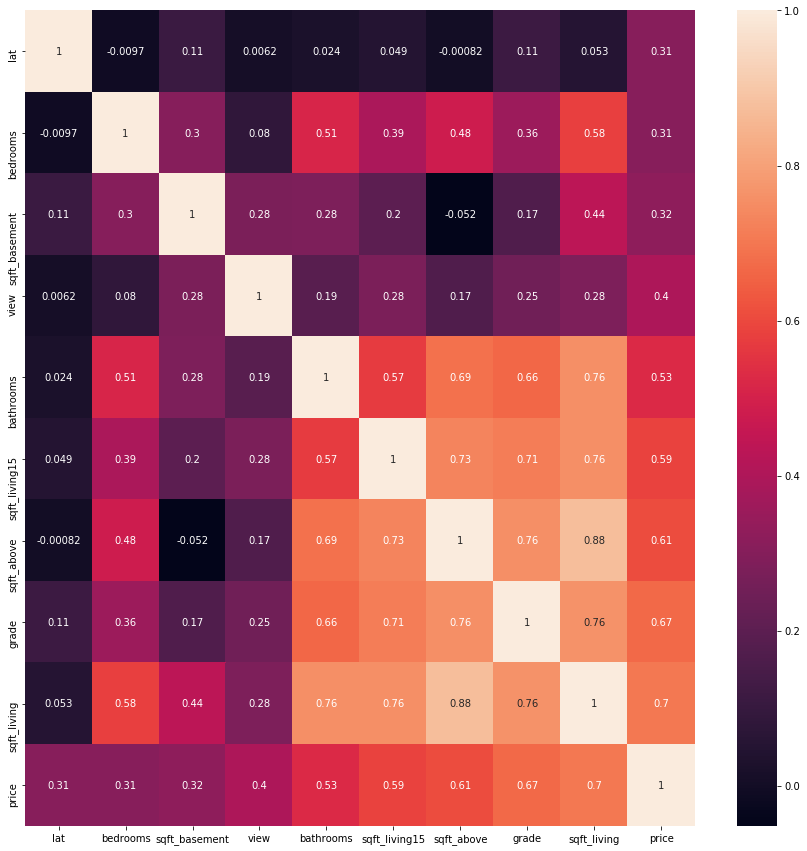

In [10]:
#Visualization of Correlation
corr_matrix= final_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000217A7956BA8>,
      dtype=object)

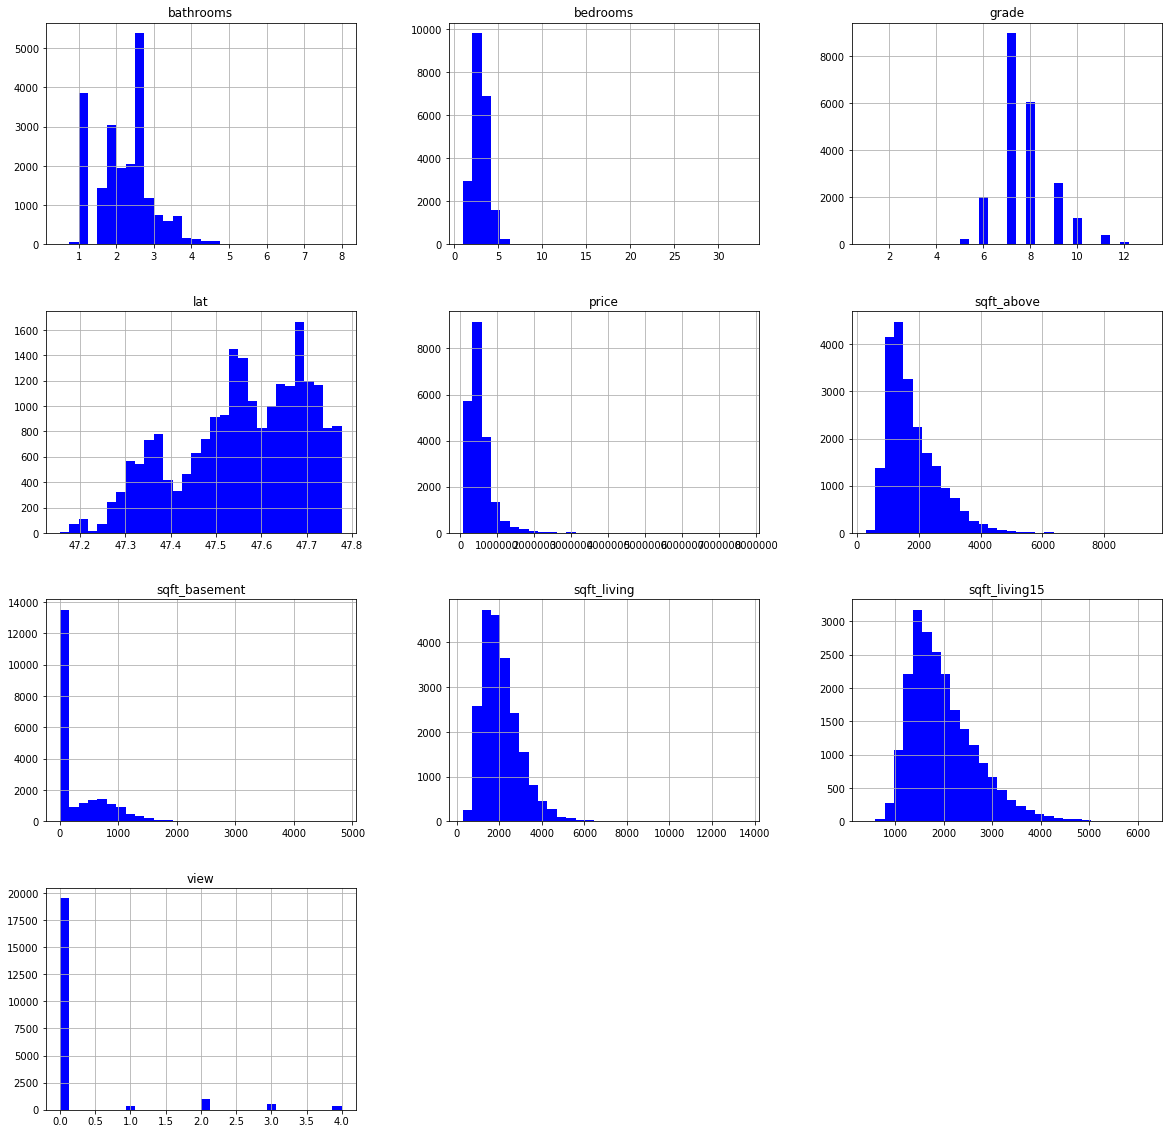

In [11]:
final_data.hist(bins=30,figsize=(20,20),color='b')

In [12]:
X=house_data.drop(columns=["price"])
y=house_data["price"]

In [13]:
#Splliting of data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

Linear Regression

In [14]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
p=lr_model.predict(X_test)
lr_bn=r2_score(y_test,p)
lr_bn

0.710714160511356

Decision Tree Regressor

In [16]:
dt_model=DecisionTreeRegressor(criterion='mse',max_depth=10,max_features="auto",min_samples_leaf=5)
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [17]:
dt_bn=dt_model.score(X_test,y_test)
dt_bn

0.8115688522699928

Random Forest Regressor

In [18]:
rf_model=RandomForestRegressor(n_estimators=100,max_depth=10)
rf_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [19]:
rf_bn=rf_model.score(X_test,y_test)
rf_bn

0.8642222914654465

Polynomial Regression

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [21]:
pr=PolynomialFeatures(degree=4)
X_train_pr=pr.fit_transform(X_train)
X_test_pr=pr.fit_transform(X_test)
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
p=lr.predict(X_test)
pr_bn=r2_score(y_test,p)
pr_bn

0.7126663013562755

Data Normalization

In [23]:
scaler_X=StandardScaler()
X=scaler_X.fit_transform(X)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [24]:
scaler_y=StandardScaler()
y=scaler_y.fit_transform(np.array(y).reshape(-1,1))

In [25]:
#Splliting of data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

Linear Regression

In [26]:
lr_model=LinearRegression(normalize=True)
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [27]:
p=lr_model.predict(X_test)
lr_an=r2_score(y_test,p)
lr_an

0.6967494253920546

Decision Tree Regressor

In [28]:
dt_model=DecisionTreeRegressor(criterion='mse',max_depth=10,max_features="auto",min_samples_leaf=8)
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [29]:
dt_an=dt_model.score(X_test,y_test)
dt_an

0.8075935252144709

Random Forest Regressor

In [30]:
rf_model=RandomForestRegressor(n_estimators=100,max_depth=12)
rf_model.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
rf_an=rf_model.score(X_test,y_test)
rf_an

0.8818478751755078

Polynomial Regression

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [33]:
pr=PolynomialFeatures(degree=3)
X_train_pr=pr.fit_transform(X_train)
X_test_pr=pr.fit_transform(X_test)
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
p=lr.predict(X_test)
pr_an=r2_score(y_test,p)
pr_an

0.6978322421825867

Accuracy before Normalization

In [35]:
bn={'Models':["Decission Tree Regressor","Random Forest Regressor","Linear Regression","Polynomial Regression"],
   "Accuracy":[dt_bn,rf_bn,lr_bn,pr_bn]}
df = pd.DataFrame (bn, columns = ['Models','Accuracy'],index=['a','b','c','d'])
df

,Models,Accuracy
a,Decission Tree Regressor,0.811569
b,Random Forest Regressor,0.864222
c,Linear Regression,0.710714
d,Polynomial Regression,0.712666


Accuracy after Normalization

In [36]:
an={'Models':["Decision Tree Regressor","Random Forest Regressor","Linear Regression","Polynomial Regression"],
   "Accuracy":[dt_an,rf_an,lr_an,pr_an]}
df = pd.DataFrame (an, columns = ['Models','Accuracy'],index=['a','b','c','d'])
df

,Models,Accuracy
a,Decision Tree Regressor,0.807594
b,Random Forest Regressor,0.881848
c,Linear Regression,0.696749
d,Polynomial Regression,0.697832
